## Clustering pipeline example

### Imports and global opts

In [1]:
import os

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from ipywidgets import interact, widgets

from plot import PlotScores

opts = {
        'mice': ['A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21'],
        'data_dir': os.path.join(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))), 'data'),
        'results_dir': os.path.join(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))), 'results')
        }

### Local opts, load data, analyze, save results

In [2]:
# set local opts
opts.update({
            'min_clusters': 2,
            'max_clusters': 10
            })
 
for mouse in tqdm(opts['mice']):
    # load the subject's data
    data = np.load(os.path.join(opts['data_dir'], f'{mouse}_data.npy'))
    # find the scores per n_clusters
    labels_per_n_clusters = [KMeans(n_clusters=n_clusters).fit(data).labels_
                            for n_clusters in range(opts['min_clusters'], opts['max_clusters']+1)]
    scores_per_n_clusters = [silhouette_score(data, labels) for labels in labels_per_n_clusters]
    # save the scores to file
    np.save(os.path.join(opts['results_dir'], f'{mouse}_scores.npy'), scores_per_n_clusters)

  0%|          | 0/10 [00:00<?, ?it/s]

### Load results, interactive plot, save figure

In [6]:
%matplotlib widget


# load the scores
all_scores = {mouse: np.load(os.path.join(opts['results_dir'], f'{mouse}_scores.npy')) for mouse in opts['mice']}

# interactive plot
plot_scores = PlotScores(all_scores, opts)

widgets.VBox([plot_scores.mouse])



In [11]:
!jupyter labextension list

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-labextension` not found.


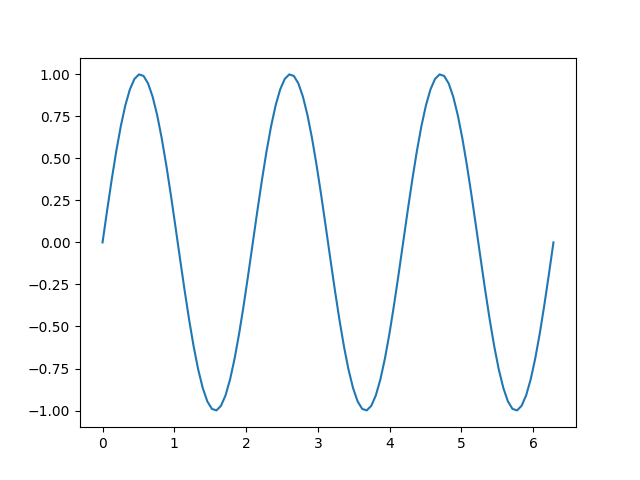

In [10]:

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

In [8]:
# load the scores
all_scores = {mouse: np.load(os.path.join(opts['results_dir'], f'{mouse}_scores.npy')) for mouse in opts['mice']}

# plot the scores
def plot_scores(mouse):
    plt.cla()
    clusters_range = np.arange(2, 2+len(list(all_scores.values())[0]))
    if mouse == 'all':
        scores = [all_scores[mouse] for mouse in opts['mice']]
        plt.errorbar(clusters_range, np.mean(scores, axis=0), yerr=np.std(scores, axis=0) / 
                    np.sqrt(len(opts['mice'])), label='all', color='tab:blue')
        [plt.plot(clusters_range, all_scores[mouse], alpha=0.25, label=mouse, color='tab:blue') for mouse in opts['mice']]
    else:
        plt.plot(clusters_range, all_scores[mouse], label=mouse)
    plt.xlabel('Num. clusters')
    plt.ylabel('Silhouette score')
    plt.show()
    # add bottom
    plt.subplots_adjust(bottom=0.15)
    # save figure
    plt.savefig(os.path.join(opts['results_dir'], 'scores_plot.svg'))

# interact with the plot
interact(plot_scores, mouse=widgets.Dropdown(options=['all', *opts['mice']], description='Mouse:'))

interactive(children=(Dropdown(description='Mouse:', options=('all', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',…

<function __main__.plot_scores(mouse)>